### Dependencies and Setup

In [1]:
  # Importing library
%matplotlib inline

In [2]:
  # Importing external packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
  # File to Load 
ticket_data = "output_data//cleansed_dataframe.xlsx"

In [4]:
  # Read the Ticket file and store Pandas data frame
df_ticket_cl = pd.read_excel(ticket_data)

# Print out in the window
df_ticket_cl.head()

,Case ID,Company,Region,Status,Source,Current Agent,Creation Date,Due Date,Closed Date,Service Group,...,Creation Year,Creation Month,Creation Day,Due_Date,Due Time,Due Year,Due Month,Due Day,Closed_Date,Closed Time
0,8111665,AU,APAC,Closed,E-mail,MYHRW_JuliusB,11/05/18 22:07,11/20/18 21:00,11/16/18 07:45,MyHRW,...,2018,11,5,2018-11-20,21:00:00,2018,11,20,2018-11-16,07:45:00
1,8111974,AU,APAC,Closed,E-mail,MyHRW_AdamSu,11/05/18 23:00,11/13/18 22:01,11/05/18 23:21,MyHRW,...,2018,11,5,2018-11-13,22:01:00,2018,11,13,2018-11-05,23:21:00
2,8112663,AU,APAC,Closed,E-mail,MyHRW_AdamSu,11/06/18 04:18,11/07/18 22:01,11/06/18 04:52,MyHRW,...,2018,11,6,2018-11-07,22:01:00,2018,11,7,2018-11-06,04:52:00
3,8112727,AU,APAC,Closed,Interface,MyHRW_AdamSu,11/06/18 04:58,11/08/18 22:01,11/06/18 05:04,MyHRW,...,2018,11,6,2018-11-08,22:01:00,2018,11,8,2018-11-06,05:04:00
4,8112910,AU,APAC,Closed,E-mail,MYHRW_JuliusB,11/06/18 06:06,11/13/18 22:01,11/06/18 07:31,MyHRW,...,2018,11,6,2018-11-13,22:01:00,2018,11,13,2018-11-06,07:31:00


### The Service Type Demand

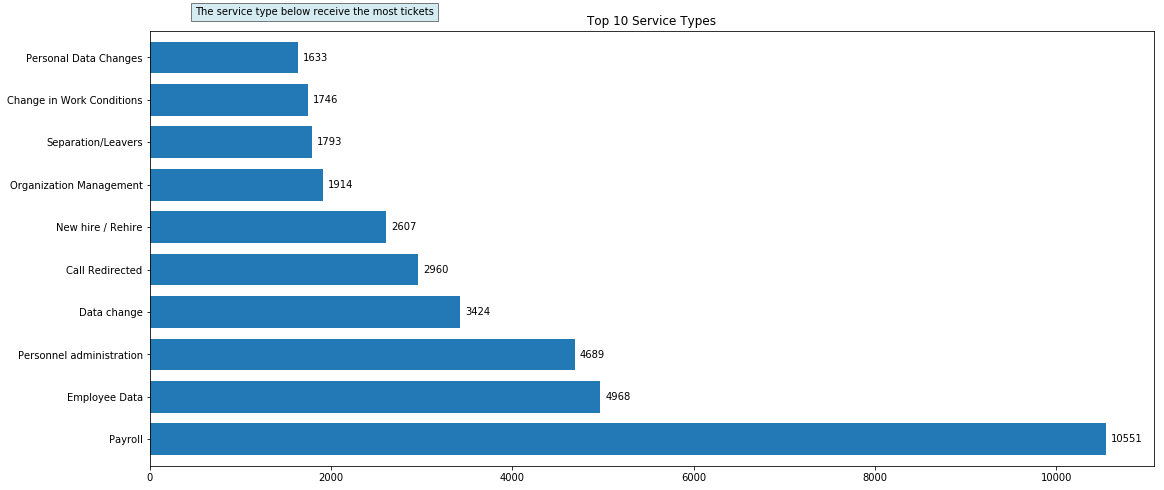

In [5]:
# The focus of this analysis, is ticket usage by service location
# Again, value_counts() is leveraged to find unique row count by service location
popular_Service_Type = df_ticket_cl['Service'].value_counts()
popular_Service_Type.sort_values(ascending = False).head(6)

# Plot covers the top 10 service locations that potray more usage than other locations
pop_location_chart = popular_Service_Type[0:10].plot(kind = "barh",width = 0.75,figsize = (18,8),alpha = 0.99)
plt.title("Top 10 Service Types")
plt.text(500,10,"The service type below receive the most tickets",bbox=dict(facecolor='Lightblue',alpha =0.5) )
#plt.text(300,6.5,"The service type below receive the most tickets",bbox=dict(facecolor='Lightblue',alpha =0.5) )


rects = pop_location_chart.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.0f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.

    
plt.savefig("Images/1_Top 10 Service Types.png",bbox_inches = "tight")
plt.show()

Jacksonville     32455
Granada          19711
Dalian            3104
Katowice          2927
Buenos Aires      1876
Manila            1735
St Johns          1688
Washington DC     1190
Name: Service Center, dtype: int64


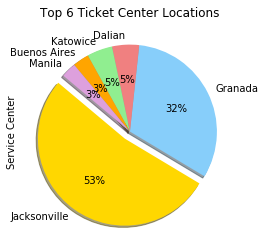

In [6]:
  # Analysis by Tickets Types helps determine which programs are popular. 
popular_category_type = df_ticket_cl['Service Center'].value_counts() 
print(popular_category_type.head(10))

# plot the graph for the popular mebership types 
explode = (0.1,0,0,0,0,0)
colors = ["gold", "lightskyblue", "lightcoral","lightgreen","orange","plum"]
popular_category_type[0:6].plot.pie(colors = colors , explode = explode, shadow=True,
autopct='%1.0f%%', startangle=140)

plt.title("Top 6 Ticket Center Locations")

plt.savefig("Images/2_Top 6 Ticket Center Locations.png",bbox_inches = "tight")
plt.show()